In [ ]:
from scipy import *
from pylab import *
from numpy import *
from PIL import Image
import cv2
from scipy.ndimage import measurements, morphology
figure()
im = cv2.imread('../img/papel2.jpg')
subplot(2,2,1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imshow(im)
im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
im[:,:,2] = (im[:,:,0] >= 8) * im[:,:,2] 
im[:,:,2] = (im[:,:,0] < 22) * im[:,:,2]
im[:,:,2] = (im[:,:,1] > 80) * im[:,:,2]
im = cv2.cvtColor(cv2.cvtColor(im, cv2.COLOR_HSV2BGR),cv2.COLOR_BGR2GRAY)
subplot(2,2,2)
gray()
imshow(im)
im = 1*(im>90)
subplot(2,2,3)
imshow(im)
im_open = morphology.binary_opening(im, ones(( 100,100)), iterations=1)
im_closed = morphology.binary_closing(im, ones((20,20)))
subplot(2,2,4)
imshow(im_closed)
labels, nbr_objects = measurements.label(im_closed)
center_of_mass = array(measurements.center_of_mass(im_closed, labels=labels, index=range(1,nbr_objects+1) ), dtype=float)
print(center_of_mass)
print("number of objects: "+str(nbr_objects)+"    labels:"+str(labels.shape))
figure(figsize=(20,100))
gray()
imshow(im_closed)

for i in range(nbr_objects):
    text(center_of_mass[i][1], center_of_mass[i][0], 'Objeto', color='black', horizontalalignment='center',verticalalignment='center')

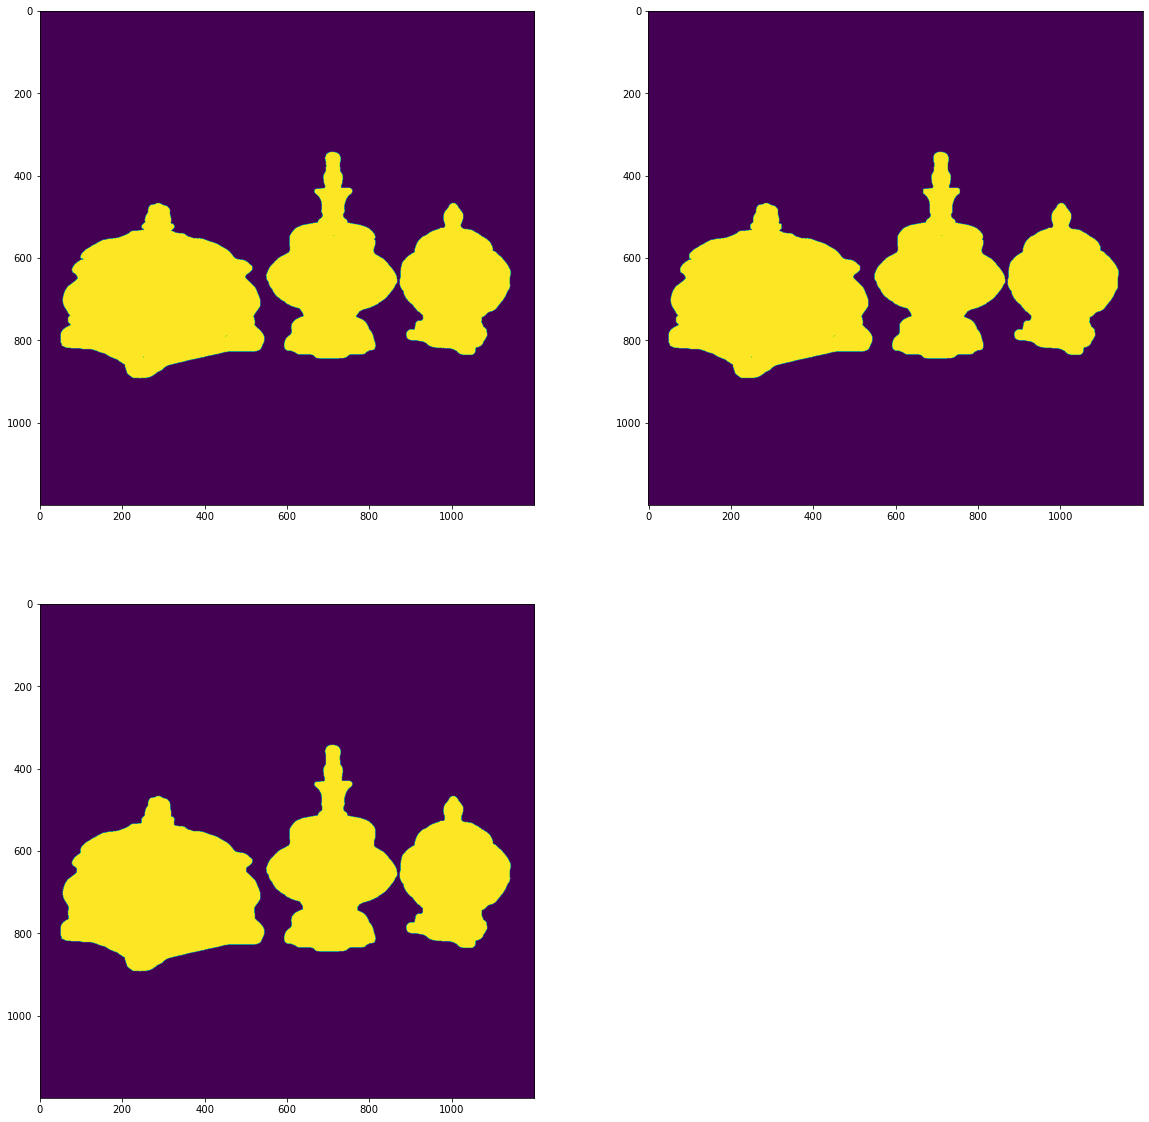

In [2]:
figure(figsize=(20,20))
subplot(2,2,1)
imshow(im)
subplot(2,2,2)
imshow(im_open)
subplot(2,2,3)
imshow(im_closed)

In [67]:
import cv2
from pylab import *

a = cv2.imread('segmentacaoCores/papel1.jpg')
a = cv2.cvtColor(a, cv2.COLOR_BGR2HSV)
a[:,:,2] = (a[:,:,0] >= 10) * a[:,:,2]
a[:,:,2] = (a[:,:,0] < 30) * a[:,:,2]
a = cv2.cvtColor(a, cv2.COLOR_HSV2RGB)
print(a.max())

255


[255 127   0]


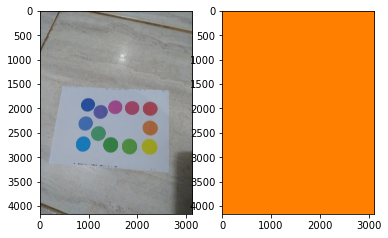

In [20]:
from scipy import *
from pylab import *
from numpy import *
from PIL import Image
import cv2
from scipy.ndimage import measurements, morphology
figure()
im = cv2.imread('segmentacaoCores/papel2.jpg')
subplot(1,2,1)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imshow(im)
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
im_hsv[:,:,:] = 255
im_hsv[:,:,0] = 15
im_hsv = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB)
subplot(1,2,2)
imshow(im_hsv)
print(im_hsv[0,0,:])

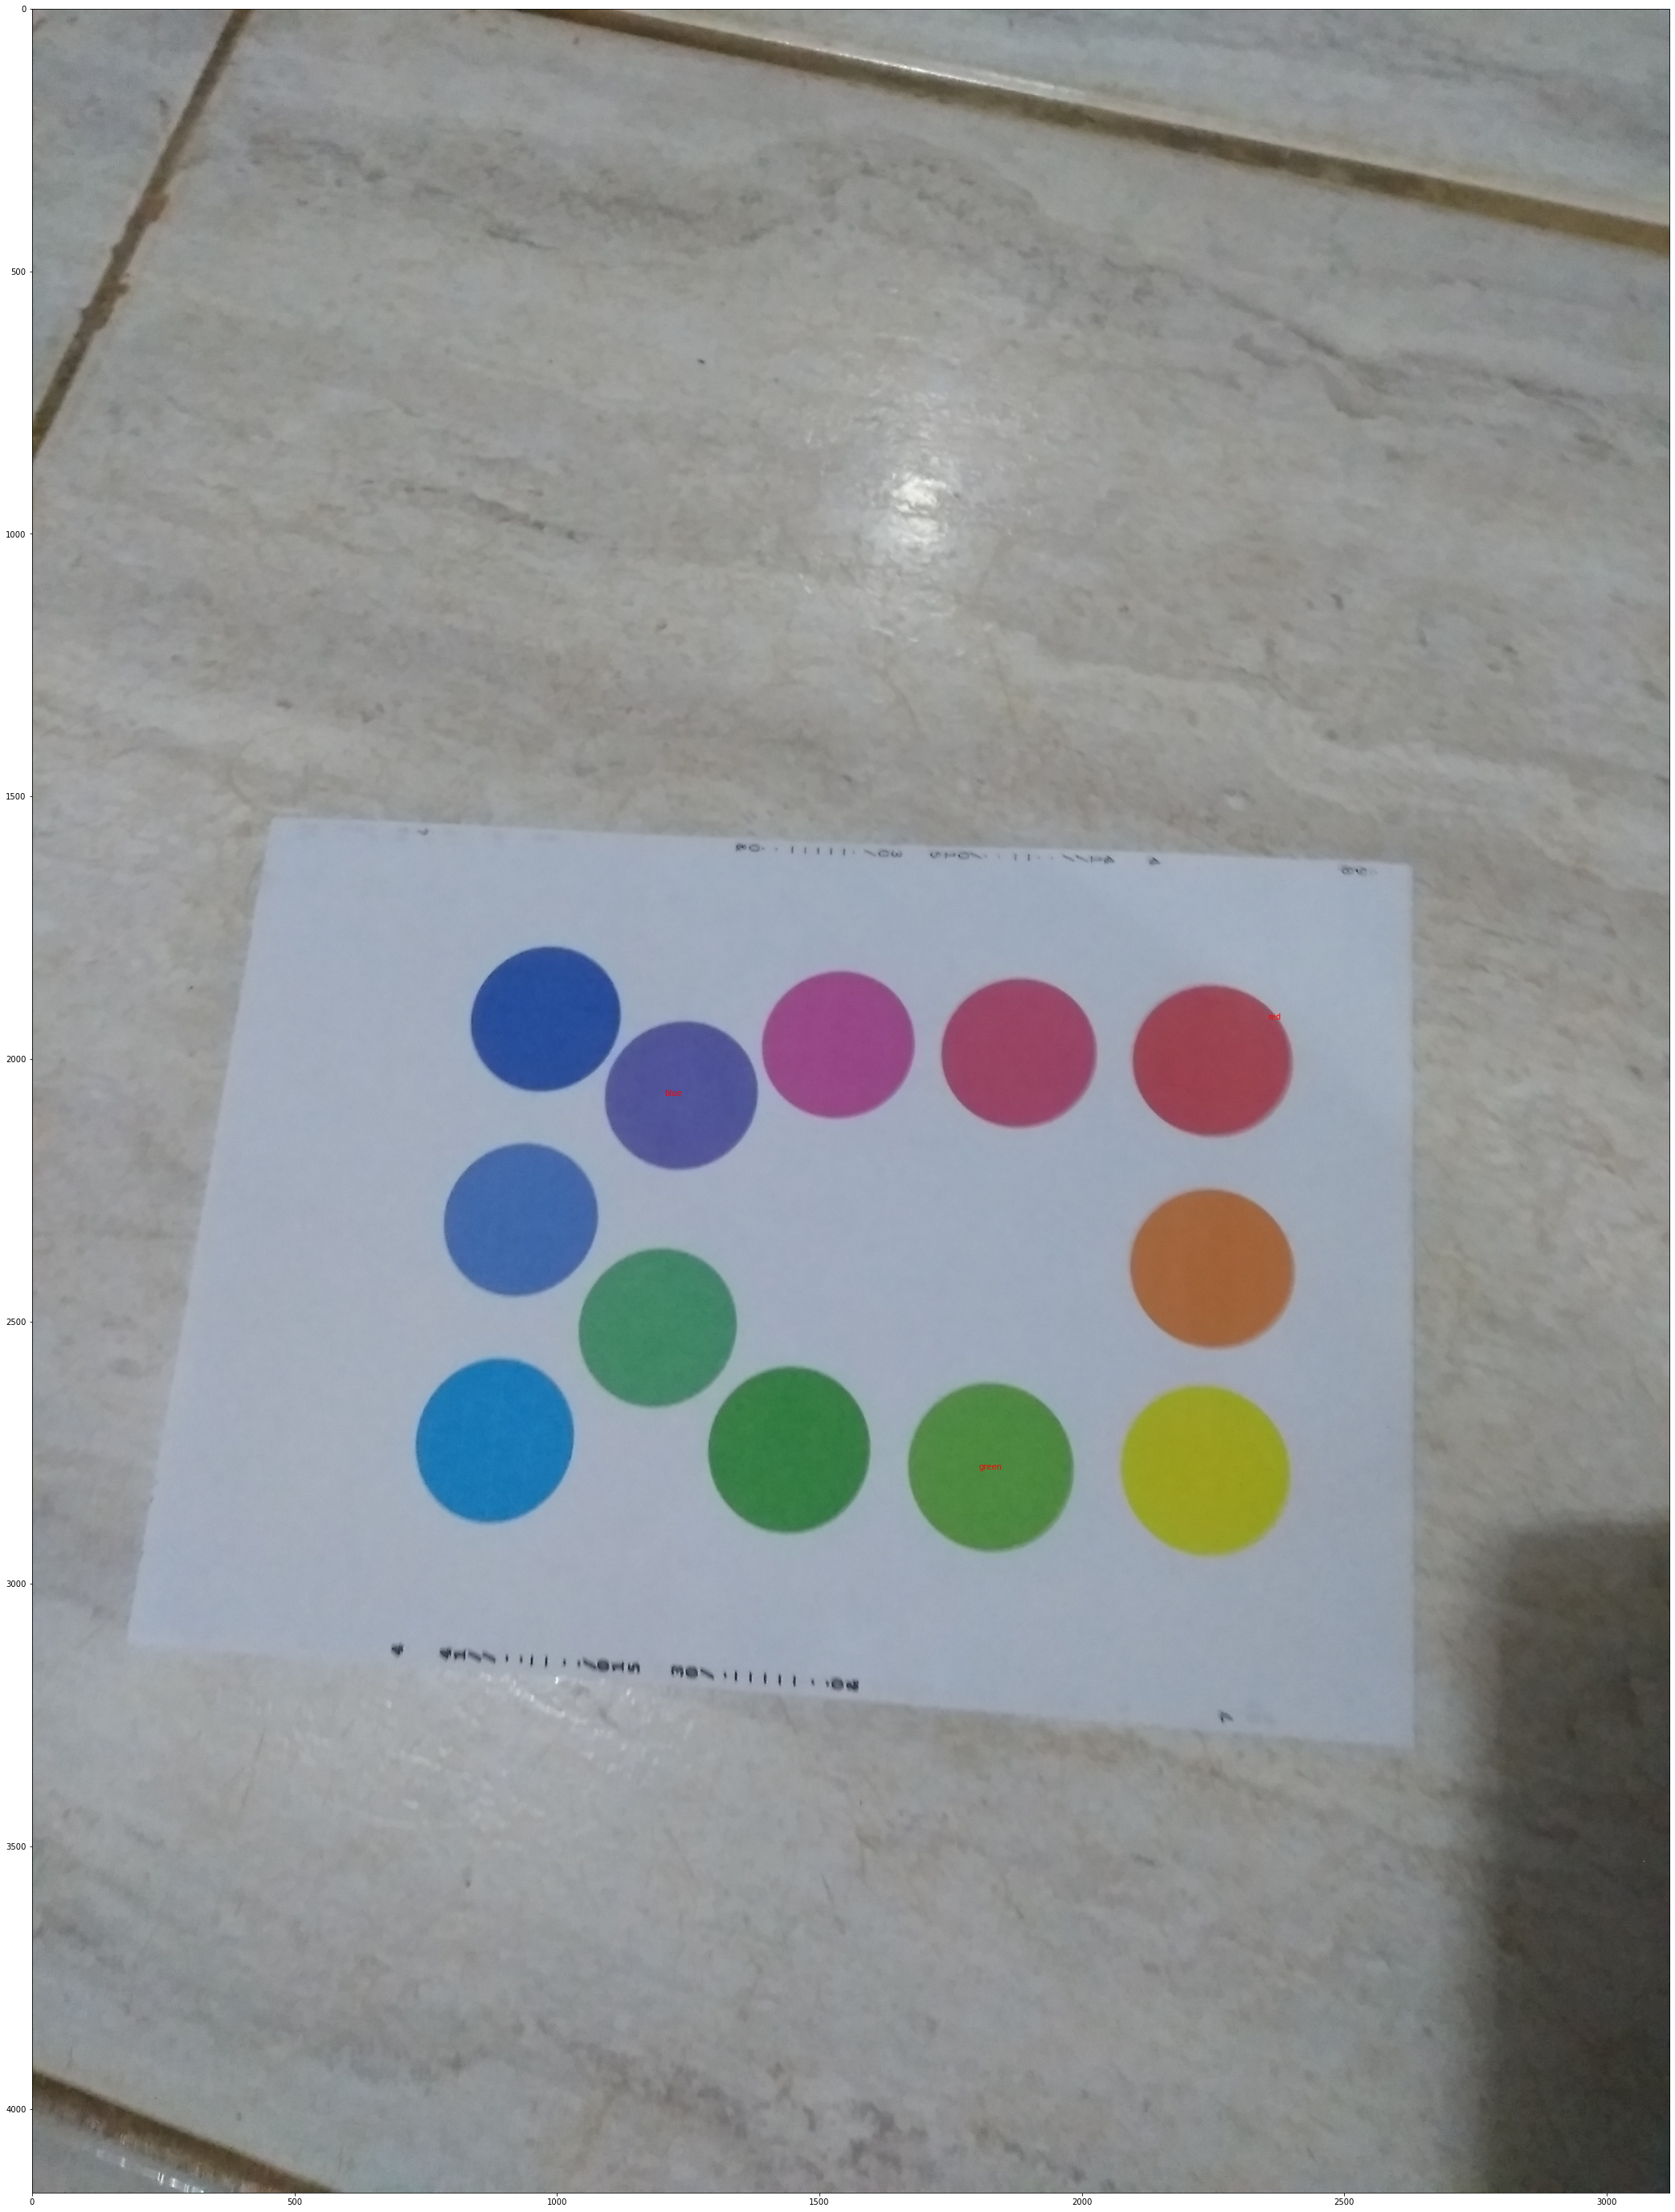

In [1]:
import robot_color_tracking as track

tracker = track.RobotColorTracking()

tracker.track('../img/papel2.jpg')
tracker.printRobotLocation()

In [2]:
print(tracker.getPoseByColor(track.Colors.blue))

[[2065.57561608 1221.89442283]]


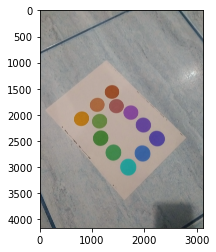

In [21]:
from scipy import *
from pylab import *
from numpy import *
from PIL import Image
import cv2
from scipy.ndimage import measurements, morphology

abacate = cv2.cvtColor(cv2.imread('../img/papel1.jpg'), cv2.COLOR_BGR2HSV)
abacate = cv2.cvtColor(abacate, cv2.COLOR_HSV2BGR)
imshow(abacate)